## Tarea 4 (comportamiento cambiando el periodo de muestreo)

Con el mismo programa EjemTransfFourier.m regrese el tiempo de grabación a un segundo, ahora haga tres corridas, la primera con Tmuestreo de 0.001 seg y luego cambie el Tmuestreo a 0.01 segundos y finalmente a Tmuestreo=0.1 segundos.

Muestre las señales que se obtienen en cada caso y la transformada de Fourier de los 3 casos, ¿tiene sentido dónde se encuentran los picos? ¿cuál es la frecuencia máxima que reporta la transformada de Fopurier para cada caso?

¿qué diferencias encuentra en el tamaño de los datos? ¿y ahora cómo cambian los vectores vfrec?

¿qué gana cuando el periodo de muestreo es el más alto?, ¿que haría si tiene problemas de espacio en la unidad de memoria donde quiere guardar los datos?

Haga un reporte en PDF para mostrar resultados y contestar a las preguntas.

In [1]:
%matplotlib inline
from numpy.fft import fft,fftshift,ifftshift
from numpy import arange,cos,abs,angle,pi,floor
import matplotlib.pyplot as plt

## Parámetro para el muestreo de los datos en el dominio del tiempo

In [34]:
T_muestreo = 0.001 # Periodo de muestreo
t_grabacion = 1 # Tiempo total de grabacion de datos (segundos)
# Formamos un array que va desde 0 a t_grabacion-Tmuestreo con incrementos de T_muestreo
t = arange(0,t_grabacion,T_muestreo)

## Construyendo señal a analizar

Se tratará una señal cosenoidal de amplitud 1 y frecuencia 2 Hz

In [35]:
frecSenal = 1   # Queremos un coseno de 1 Hz de frecuencia
A = 1   # Queremos que el coseno sea de amplitud 1
w = 2*pi*frecSenal  # Frecuencia angular
senal = A*cos(w*t)    # Construimos la señal coseniodal de amplitud 1 y frecuencia 1 Hz 

## Graficando la señal original

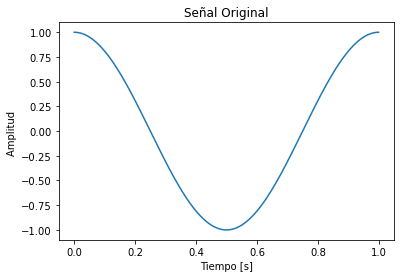

In [36]:
plt.plot(t,senal)
plt.title("Señal Original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud ")
plt.savefig("Senal_in_0_001T.png")

## Calculando la transformada de Fourier

In [37]:
fft_senal = fft(senal)

## Definición de función para correr la señal

#### Parámetros:
datos: array de la señal original
T_muestreo: Periodo de muestreo de los datos
#### Retorna:
vfreq: un array con los elementos ordenados comenzando con los valores negativos pasando por 0 hasta los positivos para poder interpretar mejor la fft

In [38]:
def calcVecFrec(datos,PeriodoMuestreo):
    #Esta funcion calcula el vector de los valores de la frecuencia (en Hz) en el
    #espacio de Fourier de una secuencia guardada en el vector datos,
    #PeriodoMuest, es el tiempo transcurrido entre medición y medición
    N = len(datos) # Calculamos la longitud de los datos
    TiempoCompleto=PeriodoMuestreo*N #Calculamos el tiempo total (de medición) de la señal
    #Verificamos si la cantidad de datos es par o impar
    if(N%2 == 0):
        # Construímos un vector que va de -int(N/2) hasta int(N/2)-1 en incrementos de 1 en 1
        vfreq = arange(-floor(N/2),floor(N/2),1)
    else:
        # Construimos un vector que va de -int(N/2) hasta int(N/2) en incrementos de 1
        vfreq = arange(-floor(N/2),floor(N/2)+1,1)
    # Hasta este punto las unidades de vfreq serán (repeticiones)
    # Queremos convertirlas a Hz como en el caso de la fft, así que dividiremos
    # entre el tiempo completo de medicion
    vfreq /= TiempoCompleto # Aqui las unidades son Hertz
    # Corremos el arreglo de tal forma que quede identico a la parte del dominio de la gráfica de
    # la transformada de fourier

    # Lo que hace ifffshift es correr un arreglo hacia la izquierda por ejemplo:
    # si vfreq = [-2,-1,0,1,2] ---> [-1,0,1,2,-2] ---> [0,1,2,-2,-1]
    vfreq = ifftshift(vfreq) # Corremos el arreglo
    return vfreq

## Creamos un array con exactamente los mismos valores del dominio en la frecuencia de la transfromada de fourier

In [39]:
vfreq = calcVecFrec(datos=senal,PeriodoMuestreo=T_muestreo)

## Graficando la FFT 

Notese que estamos corriendo nuevaente la fft tanto en dominiio (vfreq) como en sus valores (abs(FFTsenal))

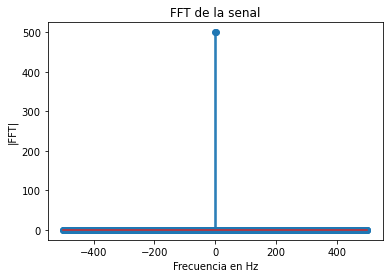

In [40]:

plt.stem(fftshift(vfreq),abs(fftshift(fft_senal)))
plt.title("FFT de la senal")
plt.xlabel('Frecuencia en Hz')
plt.ylabel('|FFT|')
plt.savefig("FFT_senal_out_nn_0_001T.png")

## Aunque parece que solo hay un contribución, observe que...

## Normalizando la magnitud de la FFT

Dado que en la grafica de la FFT (magnitud) cuando sumamos todas las contribuciones, nos da el número total de datos, es decir, la longitud del array de la FFT, podemos normalizar (para interpretar, necesitamos decir cuales son las unidades de FFT) a 1, dividiendo entre la cantidad de datos, así, la suma de todas las contribuciones dara siempre 1.

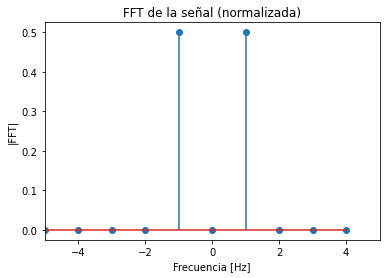

In [30]:
plt.stem(fftshift(vfreq),abs(fftshift(fft_senal))/len(fft_senal))
plt.title("FFT de la señal (normalizada)")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|FFT|')
plt.xlim([-5,5])
plt.savefig("FFT_senal_out_0_001T.png")

## Conclusiones

La principal diferencia entre cambiar el valor del periodo de muestreo no radica en un cambio en las frecuencias de la señal obtenida tras realizar la fft, sino, en la cantidad de datos disponibles en el dominio de las frecuencias, es decir, entre más pequeño sea el periodo de muestreo, mayor será el dominio en la serie discreta de Fourier

Con respecto a las frecuencias obtenidas tras realizar la fft, localizadas en $\pm 1$ Hz, concuerdan con la frecuencia de la señal original, esto, debido a que al cambiar el valor del periodo de muestreo no se afecta en ningún momento las propiedades de la señal, es decir, seguimos teniendo una señal periodica con frecuencia de 1 Hz en el dominio del tiempo, solo que, con datos más o menos espaciados segun el periodo de muestreo sea mayor o menor, respectivamente.

Cabe destacar que los casos anteriores cumplen todos con el teorema de muestreo, pues, siempre se satisface que:
$ \frac{F_{muestreo}}{2} > F_{señal}$